# Data Science & Business Analytics Intern at The Sparks Foundation - GRIP APRIL'21 Batch
### Author: Sumit Mishra

##  TASK 5: Exploratory Data Analysis - Sports

### Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
● As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.<br>
● Suggest teams or players a company should endorse for its products. 

### 1. Importing the required header files 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 2. Reading the data

In [ ]:
#Dataset: https://bit.ly/34SRn3b

#Reading the csv file using pandas library
data = pd.read_csv('matches.csv')
#Printing shape of data
print(data.shape)
#Displaying 5 records
data.head()

(756, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


* There are total of 756 records and 18 features in our dataset.

The dataset has 18 columns. Let’s get acquainted with the columns.
* id: The IPL match id.
* season: The IPL season
* city: The city where the IPL match was held.
* date: The date on which the match was held.
* team1: One of the teams of the IPL match
* team2: The other team of the IPL match
* toss_winner: The team that won the toss
* toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’
* result: The result(‘normal’, ‘tie’, ‘no result’) of the match.
* dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
* winner: The winner of the match.
* win_by_runs: Provides the runs by which the team batting first won
* win_by_wickets: Provides the number of wickets by which the team batting second won.
* player_of_match: The outstanding player of the match.
* venue: The venue where the match was hosted.
* umpire1: One of the two on-field umpires who officiate the match.
* umpire2: One of the two on-field umpires who officiate the match.
* umpire3: The off-field umpire who officiates the match


In [ ]:
#Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
#checking for any null values
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

* We can see there is multiple null values in umpire3 columns, so we'll remove it.
* Few others column also has null values but not much.
* We'll remove id feature also because it is just a unique number for all entries.

In [ ]:
#Dropping column id and umpire3

data = data.drop(['id'], axis=1)
data = data.drop(['umpire3'], axis=1)

In [ ]:
#Counting total number of duplicate records
print('There are total of',data.duplicated().sum(),'duplicate entry.')

There are total of 0 duplicate entry.


In [ ]:
#Basic description about the data such as count, mean, std, etc.
#The below details is only for numerical fields of data(In our case all columns are numerical). 
data.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,2013.444444,0.025132,13.283069,3.350529
std,3.366895,0.156630,23.471144,3.387963
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


* We've data of IPL matches from the season 2008 to 2019 for total of 756 matches.
* The victory with largest number of runs is 146.
* The victory with largest number of wickets is 10.
There were 756 IPL matches hosted from 2008 to 2019.


In [ ]:
#Reading the csv file using pandas library
delivery = pd.read_csv('deliveries.csv')
#Printing shape of data
print(delivery.shape)
#Displaying 5 records
delivery.head()

(179078, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


* Delivery data has 21 features followed by 179078 records which contains in-depth run score by each player, wicket and all detailed information.

### 3. Exploratory Data Analysis

#### Team with the most number of wins

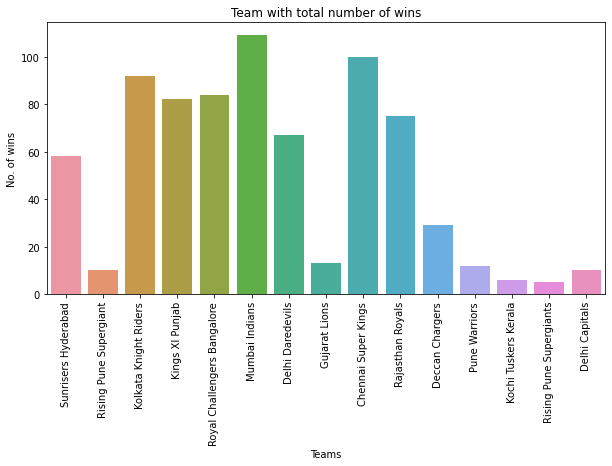

In [ ]:
#Team with the most number of wins

plt.figure(figsize = (10,5))
sns.countplot(x = 'winner', data = data)
plt.xlabel('Teams')
plt.ylabel('No. of wins')
plt.title('Team with total number of wins')
plt.xticks(rotation = 90)

* Mumbai Indians is the team which has won most number of matches followed by Chennai Super Kings.

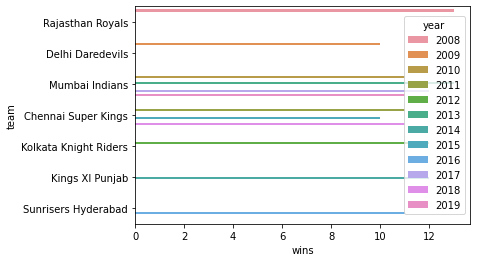

In [ ]:
#Displaying team who won the IPL season

teams_per_season = data.groupby('season')['winner'].value_counts()

year = 2008
win_per_season = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season = win_per_season.append(win_series)
        year += 1
        
sns.barplot('wins', 'team', hue='year', data=win_per_season);

* Mumbai Indians has the most wins i.e. 4 seasons(2013, 2015, 2017, and 2019).
* Chennai Super Kings won 3 seasons(2010, 2011 and 2018).

#### City with most match hosted


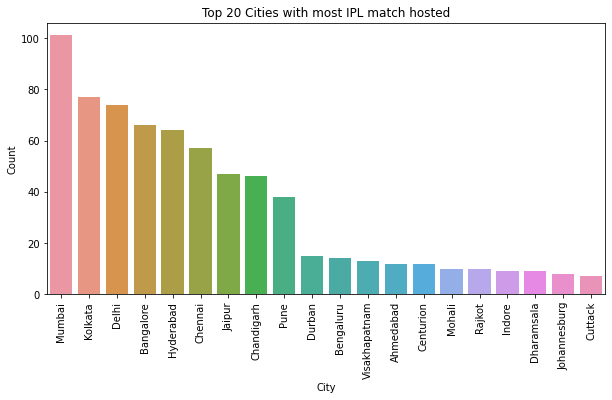

In [ ]:
#City with most match hosted

plt.figure(figsize = (10,5))
sns.barplot(data['city'].value_counts()[:20].index, data['city'].value_counts()[:20].values)
plt.title('Top 20 Cities with most IPL match hosted')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

* As shown in graph, the most matches are hosted in Mumbai city.

#### Team with most toss win

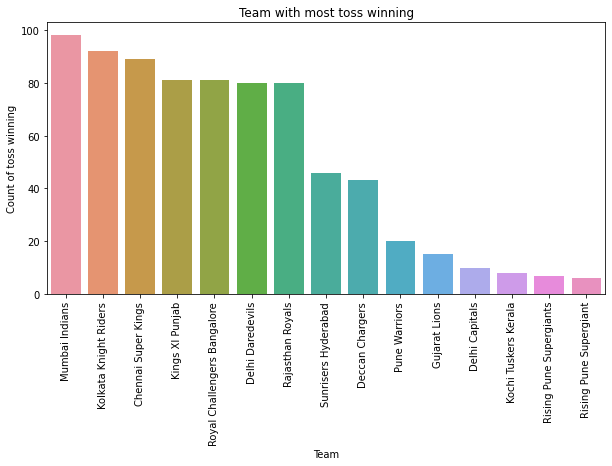

In [ ]:
#Team with most toss winning

plt.figure(figsize = (10,5))
sns.barplot(data['toss_winner'].value_counts().index, data['toss_winner'].value_counts().values)
plt.title('Team with most toss winning')
plt.xlabel('Team')
plt.ylabel('Count of toss winning')
plt.xticks(rotation = 90)
plt.show()

* Mumbai Indians has won the most number of toss follwed by Kolkata Knight Riders and Chennai Super Kings.
* All the top teams in IPL are successful in winning the toss as well.

#### Comparision between decision after winning toss

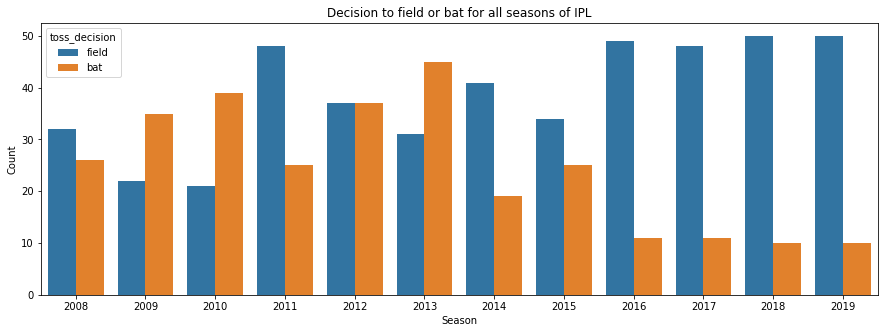

In [ ]:
#Comparing the decision selected by team after winning toss

plt.figure(figsize=(15,5))
sns.countplot(data['season'].sort_values(), hue = data['toss_decision'])
plt.title("Decision to field or bat for all seasons of IPL")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

* As we can observe, in earliew season choosing bat or field was having equal probabilities but in recent season most of the team opt to choose fielding first.

#### Team with total number of wins w.r.t. toss decision

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

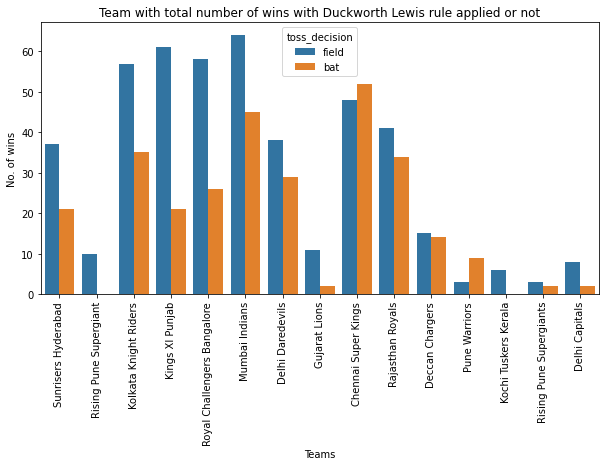

In [ ]:
#Team with total number of wins w.r.t. toss decision

plt.figure(figsize = (10,5))
sns.countplot(x = 'winner', data = data, hue = 'toss_decision')
plt.xlabel('Teams')
plt.ylabel('No. of wins')
plt.title('Team with total number of wins as per toss decision')
plt.xticks(rotation = 90)

* As we can observe, in most of the matches winning team is those who opt or got to field first.

#### Team with total number of wins with Duckworth Lewis rule applied or not

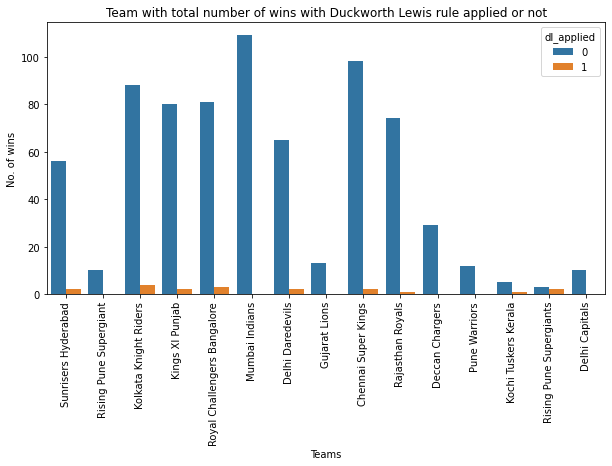

In [ ]:
#Team with total number of wins with Duckworth Lewis rule applied or not

plt.figure(figsize = (10,5))
sns.countplot(x = 'winner', data = data, hue = 'dl_applied')
plt.xlabel('Teams')
plt.ylabel('No. of wins')
plt.title('Team with total number of wins with Duckworth Lewis rule applied or not')
plt.xticks(rotation = 90)

* Mumbai Indians is the team who won maximum number of matches irrespective of Duckworth-Lewis rule applied or not.

#### Team who won the toss as well as match

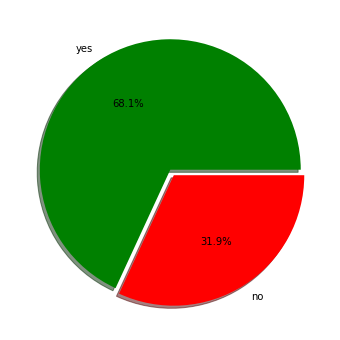

In [ ]:
#Team who won the toss as well as match

df = data[data['toss_winner'] == data['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
plt.pie(slices, labels=labels, shadow=True, explode=(0,0.05), autopct='%1.1f%%', colors=['g','r'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

* Out of all the matches, 68.1% of time toss winner was also match winners.
* So, we can say winning a toss also impacts the result of match but it totally depends on effort and strategy of team.

#### Man of the Match Winners


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

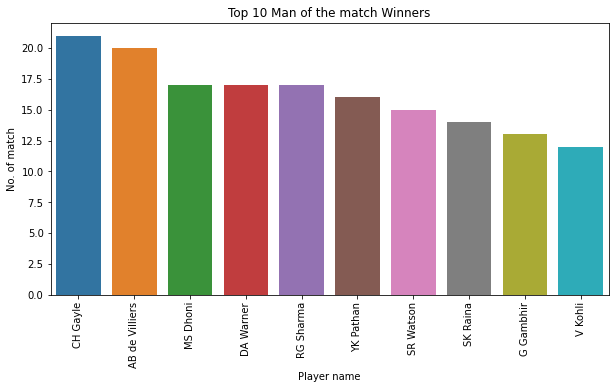

In [ ]:
#Top 10 players with most Man of the match title

plt.figure(figsize = (10,5))
sns.barplot(x = data['player_of_match'].value_counts()[:10].index, y = data['player_of_match'].value_counts()[:10])
plt.title('Top 10 Man of the match Winners')
plt.xlabel('Player name')
plt.ylabel('No. of match')
plt.xticks(rotation = 90)

* Chris Gayle has won most man of the match title.

#### Venue with most match hosted


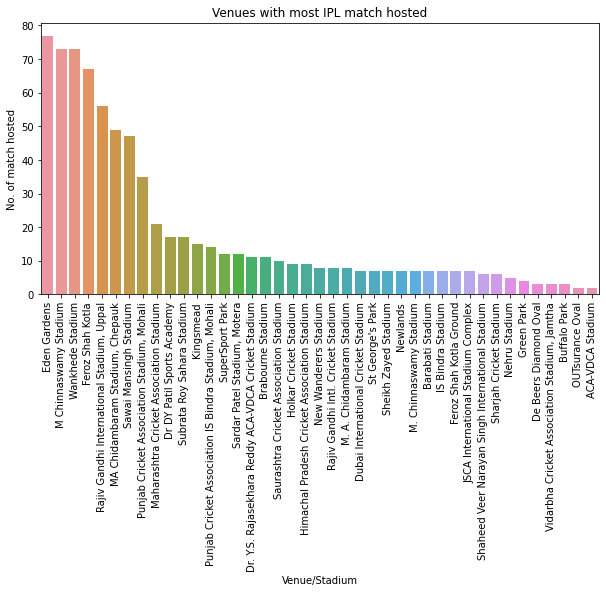

In [ ]:
#Venue with most match hosted

plt.figure(figsize = (10,5))
sns.barplot(data['venue'].value_counts().index, data['venue'].value_counts().values)
plt.title('Venues with most IPL match hosted')
plt.xlabel('Venue/Stadium')
plt.ylabel('No. of match hosted')
plt.xticks(rotation = 90)
plt.show()

* As shown in graph, the most matches are hosted in Eden Gardens stadium followed by M Chinnaswamy stadium and Wankhede stadium.

#### Top 10 Batsman who scored the maximum runs in IPL matches

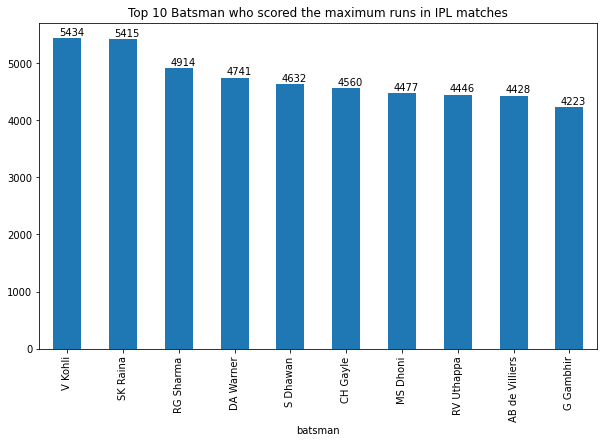

In [ ]:
#Top 10 Batsman who scored th maximum runs in IPL matches

plt.subplots(figsize=(10,6))
max_runs = delivery.groupby(['batsman'])['batsman_runs'].sum()
ax = max_runs.sort_values(ascending=False)[:10].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('Top 10 Batsman who scored the maximum runs in IPL matches')
plt.show()

* Virat Kohli and Suresh Raina has scored maximim number of runs across all IPL seasons which is 5434 and 5415 respectively.

#### Top 10 Individual Scores by batsmen

In [ ]:
#Top 10 Individual Scores by batsmen

top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


* Chris Gayle has scored maximum number of individual runs i.e. 175.

#### Player with most number of fours and sixes

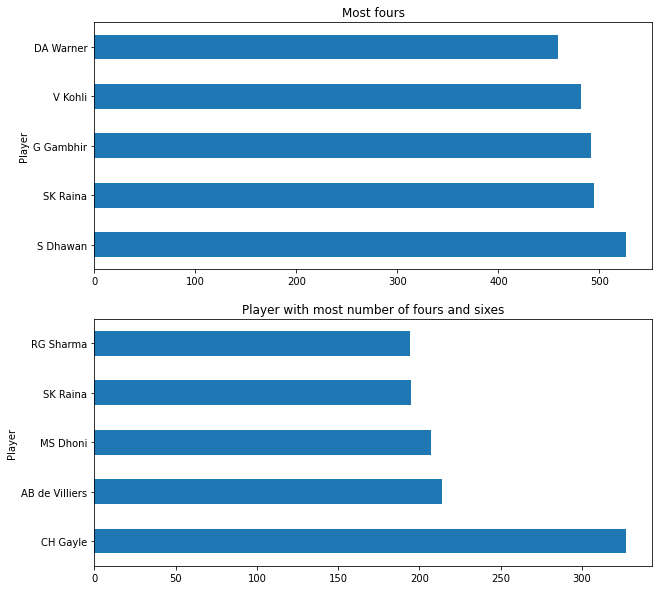

In [ ]:
#Player with most number of fours and sixes

#Getting batsmen runs for each ball played by him
top_players = delivery.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
top_players = top_players.pivot('batsman','batsman_runs','total_runs')

#Plotting subplot for most 4's and 6's
fig,ax = plt.subplots(2,figsize=(10,10))
#Picking up the playes scoring 4 run in each ball and plotting bar plot
top_players[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0])
ax[0].set_title('Most fours')
ax[0].set_ylabel('Player')
#Picking up the playes scoring 6 run in each ball and plotting bar plot
top_players[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1])
ax[1].set_title('Most sixes')
ax[1].set_ylabel('Player')
plt.title('Player with most number of fours and sixes')
plt.show()

* Chris Gayle has hitted maximum number of sixes and Shikhar Dhawan has secured a title of maximum number of fours.

### 4. Conclusion

* Mumbai Indians is the most successful team in IPL.
* Mumbai Indians has won the most number of toss.
* When defending a total, the biggest victory was by 146 runs by Mumbai Indians defeated Delhi Daredevils.
* When chasing a target, the biggest victory was by 10 wickets.
* The Mumbai city has hosted the most number of IPL matches.
* Chris Gayle has won the maximum number of player of the match title and maximum individual scores as well as maximum number of sixes.
* Virat Kohli has scored maximum number of runs across all IPL seasons whereas Shikhar Dhawan has secured a title of maximum number of fours.
* Winning toss gives a slight edge against the opponents.
* Five Indian players have figured in the top ten IPL players list.

Insights:
1. Most successful Teams : Mumbai Indians and Chennai Super Kings.
2. Best players to bid for: Chris Gayle, Ab de Villers, Virat Kohli, MS Dhoni, etc.
3. There are many factors on which the win depends: winning a toss, strategy to opt field or bat.
4. Endorsing a popular & winning team and best player for their product will be beneficial for company.